# 1. Импорт библиотек

In [44]:
import numpy as num
import matplotlib.pyplot as plot
import networkx as net
from collections import defaultdict as defdict
from networkx import all_pairs_shortest_path_length as short

# 2. Выполнение лабораторной работы №1

## Часть 2.

### №1.

#### Создание рандомных значений N, b и векторов x, w.

In [2]:
N = num.random.randint(1, 10)
x = num.random.randint(-10, 10, N)
w = num.random.randint(-10, 10, N)
b = num.random.randint(-10, 10)

print(x)
print(w)
b

[-3]
[9]


2

#### Получение значений данной функции и вывод результата.

In [3]:
res = num.dot(x, w) + b

res

-25

### №2.

#### Функции f(x) и g(x).

In [4]:
f = lambda x: x - (x ** 3) / 6 + (x ** 5) / 120 - (x ** 7) / 5040
g = lambda x: num.sin(x)

#### Отрисовка графиков функций.

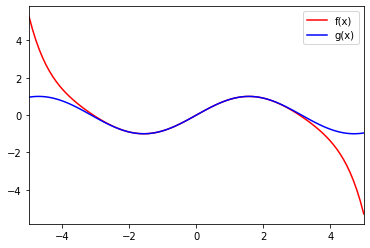

In [5]:
a = -5 
b = 5
points = num.linspace(a, b, 100) 

plot.plot(points, f(points), label = "f(x)", color = "red")
plot.plot(points, g(points), label = "g(x)", color = "blue")
plot.xlim(a, b)
plot.legend(loc = "best")

### №3.

#### Ввод радиуса и функции окружности

In [6]:
r = float(input("Радиус окружности: "))

g = lambda x: (r ** 2 - x ** 2) ** 0.5
f = lambda x: -(r ** 2 - x ** 2) ** 0.5

#### Отрисовка окружности.

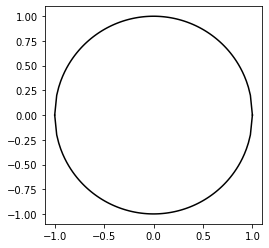

In [7]:
figure, axes = plot.subplots()
x = num.linspace(-r, r, 100)

plot.plot(x, f(x), "black")
plot.plot(x, g(x), "black")

axes.set_aspect(1) 
plot.show()

### №4.

#### Функция transformation_plot для трансформации положения точек c заданой квадратной матрицей. 

In [8]:
def transformation_plot(points, matrix):
    x = points[:, 0]
    y = points[:, 1]
    color = x * y
    
    axes[0].scatter(x, y, 100, c = color)
    
    trans_points = num.dot(points, matrix.T)
    
    trans_x = trans_points[:, 0]
    trans_y = trans_points[:, 1]
    
    axes[1].scatter(trans_x, trans_y, 100, c = color)

[[2 9]
 [6 9]]


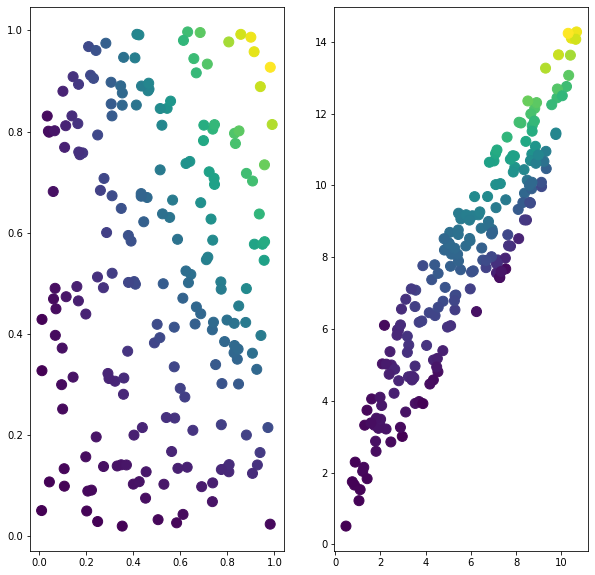

In [40]:
figure, axes = plot.subplots(1, 2, figsize=(10, 10))
matrix = num.random.randint(0, 10, size=(2, 2))

print(matrix)

transformation_plot(num.random.random(size=(200, 2)), matrix)

### №5.

#### Возьмём произвольную функцию и вычислим производную.

In [10]:
def func(x):
    return x**2 + 5*x + 5

def deriviation(x, delta = 0.0001):
    return (func(x + delta) - func(x)) / delta

def deriviation_verify(x):
    return 2*x + 5

#### Отрисуем графики.

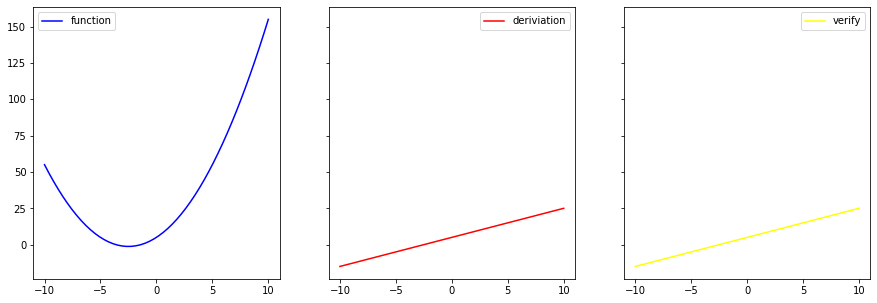

In [11]:
fig, axes = plot.subplots(1, 3, sharex = True, sharey = True, figsize = (15, 5))

data = num.linspace(-10, 10, 50)

axes[0].plot(data, func(data), label = "function", color = "blue")
axes[0].legend(loc = "best")

axes[1].plot(data, deriviation(data), label = "deriviation", color = "red")
axes[1].legend(loc = "best")

axes[2].plot(data, deriviation_verify(data), label = "verify", color = "yellow")
axes[2].legend(loc = "best")


plot.legend()

### №6.

In [12]:
n = int(input("Размерность векторов: "))
V = [[0] * n] * 100
for i in range(100):
    for j in range(n):
        V[i] = (num.random.random(n)-0.5)
incirc = 0
for v in V:
    if num.linalg.norm(v) <= 0.5:
        incirc +=1
print ("total vectors: 100\ninside:",incirc,"\nfraction:", (incirc/100))

total vectors: 100
inside: 100 
fraction: 1.0


### №7.

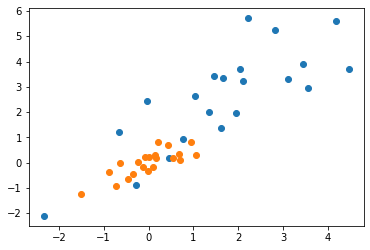

In [13]:
def foo(mat):
    for k in range(mat.shape[1]):
        col = mat[:,k]
        avg = num.mean(col)
        dis = sum((num - avg)**2 for num in col)/len(col)
        for i in range(mat.shape[0]):
            mat[i,k] = (mat[i,k] - avg)/dis
a = num.random.multivariate_normal(mean=[1,2],cov=[[2,1],[1,3]])
for i in range(20):
    a = num.vstack([a, num.random.multivariate_normal(mean=[1,2],cov=[[2,1],[1,3]])])
fig, ax = plot.subplots()
ax.scatter(a[:,0], a[:,1])
foo(a)
ax.scatter(a[:,0], a[:,1])
pass

### 9.a)

### 9.б)

#### Счётчики значений результата.

In [14]:
underestimated = 0 
underestimated_correct = 0 
exceeded = 0; 
exceeded_correct = 0 

In [15]:
def count_for_incorrect_var(incorrect_var):
    global exceeded
    global underestimated
    
    if incorrect_var > 1:
        exceeded +=1 
    elif incorrect_var < 1:
        underestimated +=1
    else:
        pass
    
def count_for_correct_var(correct_var):
    global exceeded_correct
    global underestimated_correct
    
    if correct_var > 1:
        exceeded_correct +=1 
    elif correct_var < 1:
        underestimated_correct += 1
    else:
        pass
    
def mse(x):
    summed = 0
    
    for element in x:
        summed += (element - 1) ** 2
    
    return summed / len(x)

#### 100 экспериментов по генирации элементов.

In [16]:
incorrect_arr = []
correct_arr = []

for i in range(100):
    data = num.random.normal(size = 20)
    
    incorrect = num.var(data)
    correct = num.var(data, ddof = 1)
    
    incorrect_arr.append(incorrect)
    correct_arr.append(correct)
    
    count_for_incorrect_var(incorrect)
    count_for_correct_var(correct)
    

#### Вывод результатов

In [71]:
print("Некорректная формула:")
print("Превышения -", format(exceeded))
print("Недооценивания -", format(underestimated))
print("Средний квадрат ошибки -", format(mse(incorrect_arr)))
print()
print("Корректная формула:")
print("Превышения -", format(exceeded_correct))
print("Недооценивания -", format(underestimated_correct))
print("Средний квадрат ошибки -", format(mse(correct_arr)))
    

Некорректная формула:
Превышения - 36
Недооценивания - 64
Средний квадрат ошибки - 0.08683047735602191

Корректная формула:
Превышения - 40
Недооценивания - 60
Средний квадрат ошибки - 0.09013090813995361


## Часть 3.

### №2.

#### Функция поиска друзей из связей графа.

In [75]:
def friends():
    for edge in edges: 
        vertices[edge[0]] += 1
        vertices[edge[1]] += 1

#### Функция поиска пар пользователей по их кратчайшему пути.

In [76]:
def pairs():
    for pair in pairs_list:
        for i in pair[1].values():
            if i > 0 and i < 7:
                counts[i-1] += 1
            else: 
                counts[-1] += 1

#### Обработка файла с графом vk.gml.

In [77]:
graph =  net.read_gml("vk.gml")

vertices = defdict(int)
edges = list(graph.edges)

friends()

counts = [0] * 7
pairs_list = list(short(graph))
pairs()

count_sum = sum(counts)
vert_sort = sorted(vertices.values(), reverse=True)

#### Вывод результатов.

In [78]:
print('Уникальные пользователи:', len(vertices))
print('Среднее число друзей:', round(graph.size() * 2 / len(vertices), 1))
print('Медианное число друзей:', vert_sort[len(vert_sort)//2]/2 if len(vert_sort)%2==1 else \
      (vert_sort[len(vert_sort)//2] + vert_sort[len(vert_sort) // 2-1])/2)

for i in range(6):
    print('L=' + str(i + 1) + ': ', round(counts[0] / count_sum, 2))

Уникальные пользователи: 3766
Среднее число друзей: 22.0
Медианное число друзей: 15.0
L=1:  0.01
L=2:  0.01
L=3:  0.01
L=4:  0.01
L=5:  0.01
L=6:  0.01
